In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import re 
from operator import itemgetter
import warnings
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
from shelllock import PyCCELL_PRFQT as px

In [113]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i ])
    return end_point

In [4]:
test = px.mainf('../results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_3_v2.xlsx',
               75,"YES",'col',['J6','K6','L6'])

['J3', 'J4', 'J5', 'J6', 'K3', 'K4', 'K5', 'K6', 'L3', 'L4', 'L5', 'L6']


In [5]:
test.rename(columns={"['J3', 'K3', 'L3']": '2µM_P',
                   "['J4', 'K4', 'L4']": '1µM_P',
                     "['J5', 'K5', 'L5']":'0.1µM_P' ,
                     "['J6', 'K6', 'L6']": 'NC',
                     0: '2µM_P_std',
                   1: '1µM_P_std',
                     2:'0.1µM_P_std' ,
                     3:'NC_std'
                     },
          inplace=True, errors='raise')

test.head()

,2µM_P,1µM_P,0.1µM_P,NC,Time,2µM_P_std,1µM_P_std,0.1µM_P_std,NC_std
0,0.342131,0.000000,0.063930,0.0,0,0.047871,0.171114,0.078877,0.067882
1,0.384946,0.022776,0.096090,0.0,5,0.026317,0.211519,0.082636,0.018470
2,0.918768,0.263832,0.130303,0.0,10,0.204399,0.285860,0.056470,0.039108
3,1.792864,0.564027,0.166276,0.0,15,0.314841,0.353638,0.137054,0.023297
4,2.631672,0.923363,0.228152,0.0,20,0.325130,0.357989,0.025834,0.026396


In [97]:
t = px.excelreader('../results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_3_v2.xlsx',
               75,"YES")

t.drop(columns = 'Time')

n = endpoint(t)

n['average'] = np.mean([n['J6'],n['K6'],n['L6']])
n

,J3,J4,J5,J6,K3,K4,K5,K6,L3,L4,L5,L6,average
0,8.52434,5.09912,3.574487,3.338416,8.436364,5.162757,3.752786,3.281818,7.96393,5.621994,3.68563,3.334311,3.318182


In [98]:
for i in n.columns:
    n[i] = n[i] - n['average']
    n[n < 0] = 0
    
n = n.drop(['average','J6','K6','L6'], axis=1)

n

,J3,J4,J5,K3,K4,K5,L3,L4,L5
0,5.206158,1.780938,0.256305,5.118182,1.844575,0.434604,4.645748,2.303812,0.367449


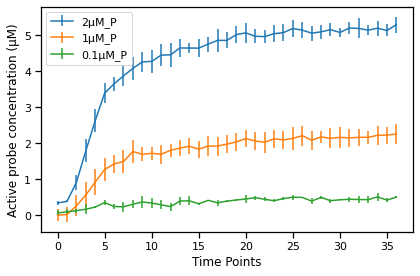

In [6]:
sns.set_context("notebook")
test[['2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test['2µM_P_std'],
                                                          test['1µM_P_std'],
                                                          test['0.1µM_P_std']])
plt.legend()
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("../images/SHERLOCK/probe_dilution_pt3.png",dpi=300)
plt.show()

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['0.1µM_P']].plot(yerr=[test['0.1µM_P_std']],ax=ax[0])
test_2[['1µM_P']].plot(yerr=[test_2['1µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

## Endpoint plots

      2µM_P    1µM_P   0.1µM_P
0  5.290518  2.25523  0.509189


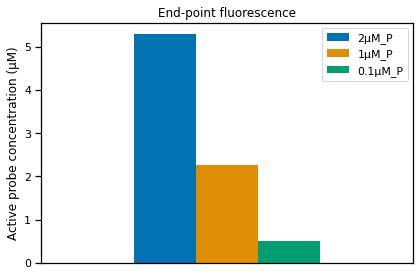

In [127]:
end_point = endpoint(test)
end_point_d = [end_point[x] for x in end_point.columns if 'std' not in x]
end_point_d = pd.DataFrame(end_point_d).T
print(end_point_d)

sns.set_context("notebook")
sns.set_palette("colorblind")

end_point_d.plot(kind='bar')
plt.legend()
plt.xticks([])
plt.ylabel("Active probe concentration (µM)")
plt.title("End-point fluorescence")
plt.tight_layout()
#plt.savefig("../images/SHERLOCK/end_point_probes.png",dpi=300)
plt.show()

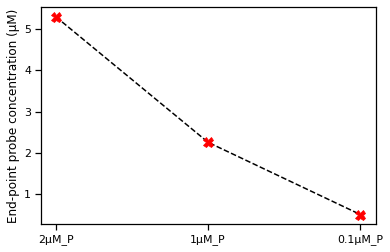

In [40]:
sns.lineplot([x for x in range(len(end_point.iloc[0]))],end_point.iloc[0],color='black',marker='X',markersize=10,
             markeredgecolor='red',markerfacecolor='red',linestyle='--')
plt.ylabel('End-point probe concentration (µM)')
plt.xticks([x for x in range(len(end_point.iloc[0]))],[x for x in end_point.columns])
plt.savefig('../images/SHERLOCK/end_point.png',dpi=300)
plt.show()

In [99]:
m = [x for x in n.columns]

duplicates = []
for char in re.findall('[a-zA-Z]',str(m)):
    '''
     checking whether the character have a duplicate or not
     str.count(char) returns the frequency of a char in the str

    '''
    if str(m).count(char) > 1:
        []
    ## appending to the list if it's already not present

    if char not in duplicates :

        duplicates.append(char)
        
b = list(np.array_split(re.findall(r'\d+ ?',str(m)),len(duplicates))[0])

print(b)

#for each repeating number add the repeating letter 
li = []

for i in b :
    for j in duplicates :
        li.append(j+str(i))
        
i = 0 
j = 0
name=[]

while i < len(li)/3:
    name.append([li[j],li[j+1],li[j+2]])
    i= i +1
    j = j+3  
        
print(name)

['3', '4', '5']
[['J3', 'K3', 'L3'], ['J4', 'K4', 'L4'], ['J5', 'K5', 'L5']]


In [100]:
pos = [0,]
counter = 0
for i in range(1,len(n.columns)):
    #print(i)
    if i%3 == 0:
        counter+=1
    pos.append(counter)
    
print(pos)

[0, 0, 0, 1, 1, 1, 2, 2, 2]


In [101]:
na = []
for i in name:
    for j in i:
        na.append(j)
        
print(na)

['J3', 'K3', 'L3', 'J4', 'K4', 'L4', 'J5', 'K5', 'L5']


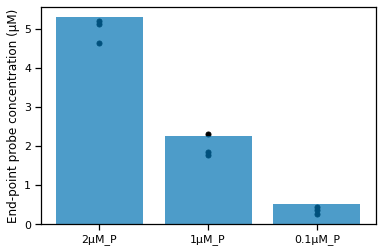

In [112]:
counter = 0
plt.bar([0,1,2],end_point.iloc[0],alpha=0.7)

for i in na:
        plt.scatter(pos[counter],n[i].iloc[0],color='black',s=25)
        counter+=1
        
plt.ylabel('End-point probe concentration (µM)')
plt.xticks([x for x in range(len(end_point.columns))],[x for x in end_point.columns])
#plt.savefig('../images/SHERLOCK/end_point_2.png',dpi=300)
plt.show()

In [128]:
std = [end_point[x] for x in end_point.columns if 'std' in x]
std = pd.DataFrame(std).T

std

,2µM_P_std,1µM_P_std,0.1µM_P_std
0,0.339373,0.357989,0.154478


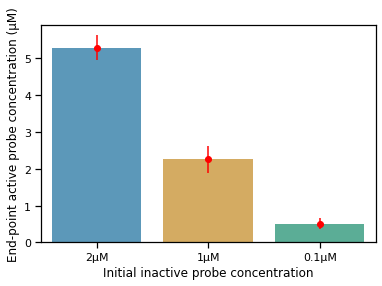

In [136]:
#end_point_d.plot(kind='bar')

plt.errorbar([x for x in range(len(end_point_d.iloc[0]))],end_point_d.iloc[0],yerr=std.iloc[0],
            fmt="o", color="r")

sns.barplot([0,1,2],end_point_d.iloc[0],alpha=0.7)
plt.ylabel('End-point active probe concentration (µM)')
plt.xticks([x for x in range(len(end_point_d.columns))],['2µM','1µM','0.1µM'])
plt.xlabel('Initial inactive probe concentration')
plt.savefig('../images/SHERLOCK/end_point_2.png',dpi=300)
plt.show()